In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Discrimination.xlsx")

In [3]:
df.drop(['id', 'ln_wage'], axis=1, inplace=True)

In [4]:
df = pd.DataFrame(df)

In [5]:
df

,year,female,exp,educ,wage
0,2001,0,5,17,50
1,2001,0,6,10,50
2,2001,1,5,17,30
3,2001,0,5,10,50
4,2001,1,9,14,70
...,...,...,...,...,...
995,2006,1,7,14,60
996,2006,0,9,10,110
997,2006,1,11,14,90
998,2006,0,7,17,100


In [6]:
female_table = df[df['female'] == 1].copy()

# Создание таблицы для мужчин
male_table = df[df['female'] == 0].copy()

In [7]:
female_table

,year,female,exp,educ,wage
2,2001,1,5,17,30
4,2001,1,9,14,70
5,2001,1,9,14,40
7,2001,1,1,10,20
8,2001,1,6,14,40
...,...,...,...,...,...
990,2006,1,2,14,40
993,2006,1,6,10,40
994,2006,1,11,14,60
995,2006,1,7,14,60


In [8]:
female_table_2001 = df[(df['female'] == 1) & (df['year'] == 2001)].copy()
male_table_2001 = df[(df['female'] == 0) & (df['year'] == 2001)].copy()
female_table_2006 = df[(df['female'] == 1) & (df['year'] == 2006)].copy()
male_table_2006 = df[(df['female'] == 0) & (df['year'] == 2006)].copy()

female_table_2001.drop(['female'], axis=1, inplace=True)
male_table_2001.drop(['female'], axis=1, inplace=True)
female_table_2006.drop(['female'], axis=1, inplace=True)
male_table_2006.drop(['female'], axis=1, inplace=True)

In [9]:
print("The average exprience of male and female in company in 2001 is {} and {}".format(male_table_2001["exp"].mean(), female_table_2001["exp"].mean()))
print("The average education rate of male and female in company in 2001 is {} and {}".format(male_table_2001["educ"].mean(), female_table_2001["educ"].mean()))
print("The average wage of male and female in company in 2001 is {} and {}".format(male_table_2001["wage"].mean(), female_table_2001["wage"].mean()))

The average exprience of male and female in company in 2001 is 5.159533073929961 and 4.921810699588478
The average education rate of male and female in company in 2001 is 11.817120622568094 and 11.954732510288066
The average wage of male and female in company in 2001 is 67.70428015564202 and 45.06172839506173


In [10]:
print("The average exprience of male and female in company in 2006 is {} and {}".format(male_table_2006["exp"].mean(), female_table_2006["exp"].mean()))
print("The average education rate of male and female in company in 2006 is {} and {}".format(male_table_2006["educ"].mean(), female_table_2006["educ"].mean()))
print("The average wage of male and female in company in 2006 is {} and {}".format(male_table_2006["wage"].mean(), female_table_2006["wage"].mean()))

The average exprience of male and female in company in 2006 is 7.634241245136187 and 7.329218106995885
The average education rate of male and female in company in 2006 is 12.8715953307393 and 12.958847736625515
The average wage of male and female in company in 2006 is 83.89105058365759 and 47.901234567901234


In [30]:
# Initialize data to Dicts of series.
d_2001 = {
    'male': pd.Series([5.15, 11.81, 67.7], index=['avg exp', 'avg educ', 'avg wage']),
    'female': pd.Series([4.92, 11.95, 45.06], index=['avg exp', 'avg educ', 'avg wage']),
    'year': pd.Series([2001, 2001, 2001], index=['avg exp', 'avg educ', 'avg wage'])
}

d_2006 = {
    'male': pd.Series([7.63, 12.87, 83.89], index=['avg exp', 'avg educ', 'avg wage']),
    'female': pd.Series([7.32, 12.95, 47.9], index=['avg exp', 'avg educ', 'avg wage']),
    'year': pd.Series([2006, 2006, 2006], index=['avg exp', 'avg educ', 'avg wage'])
}

df_2001 = pd.DataFrame(d_2001)
df_2006 = pd.DataFrame(d_2006)

df_concatenated = pd.concat([df_2001, df_2006])

In [33]:
from IPython.display import display, Markdown

# print the data.
display(Markdown(df_concatenated.to_markdown()))

|          |   male |   female |   year |
|:---------|-------:|---------:|-------:|
| avg exp  |   5.15 |     4.92 |   2001 |
| avg educ |  11.81 |    11.95 |   2001 |
| avg wage |  67.7  |    45.06 |   2001 |
| avg exp  |   7.63 |     7.32 |   2006 |
| avg educ |  12.87 |    12.95 |   2006 |
| avg wage |  83.89 |    47.9  |   2006 |

In [28]:
#Теперь построим график зависимости опыта работы от зароботка для мужчин и женщин
exp_wage_female = female_table[['exp', 'wage']]
exp_wage_male = male_table[['exp', 'wage']]

exp_wage_female

,exp,wage
2,5,30
4,9,70
5,9,40
7,1,20
8,6,40
...,...,...
990,2,40
993,6,40
994,11,60
995,7,60


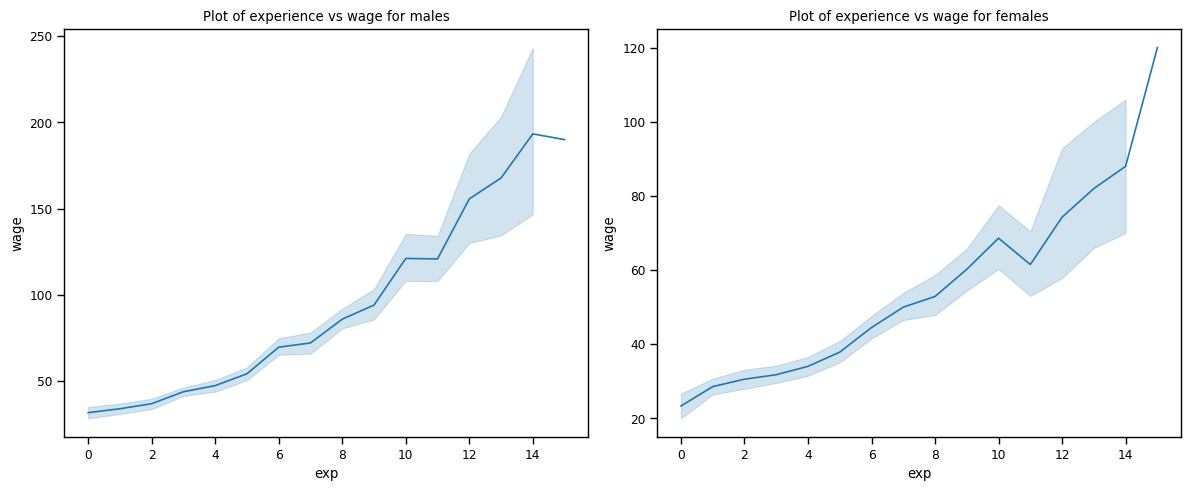

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.lineplot(x="exp", y="wage", data=exp_wage_male, ax=axes[0])
axes[0].set_title('Plot of experience vs wage for males')

# Plot the second line plot
sns.lineplot(x="exp", y="wage", data=exp_wage_female, ax=axes[1])
axes[1].set_title('Plot of experience vs wage for females')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()